# Lab 4

## Importing Libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Dataset

In [4]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv('./sample_data/car.data', names=column_names)

### First 5 Rows

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in df.columns:
  print(f"{col}: {df[col].unique()}")

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [10]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1728, 7)


## Preprocessing

There are no missing values, so there is no need for imputing or removing rows.

### Label Encoder

For Decision Tree and Random Forest (tree-based models), label encoding categorical features is usually enough. These models can handle integer-encoded categories well without implying ordinal relationships.

In [12]:
le = LabelEncoder()
data_le = df.copy()
for col in data_le.columns:
    data_le[col] = le.fit_transform(data_le[col])

X_le = data_le.drop('class', axis=1)
y_le = data_le['class']

In [13]:
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

### One-Hot Encoder

For Neural Networks, one-hot encoding is generally better since neural nets can misinterpret integer labels as ordinal. One-hot encoding prevents that by creating separate binary features for each category.

In [14]:
X_nn = pd.get_dummies(df.drop('class', axis=1))
le_target = LabelEncoder()
y_nn = le_target.fit_transform(df['class'])

In [15]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

## Implementation of Models

### Decision Tree

Training a Decision Tree classifier using the label-encoded features, while experimenting with parameters such as `max_depth`, `min_samples_split`, `criterion`, and visualizing the tree and analyze feature importance.

In [83]:
dt_params = {
    'max_depth': 8,
    'min_samples_split': 10,
    'criterion': 'gini'
}

dt_clf = DecisionTreeClassifier(**dt_params, random_state=42)
dt_clf.fit(X_train_le, y_train_le)
y_pred_dt = dt_clf.predict(X_test_le)

In [84]:
print("Decision Tree Classification Report:\n", classification_report(y_test_le, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test_le, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87        83
           1       0.47      0.82      0.60        11
           2       0.97      1.00      0.99       235
           3       0.81      1.00      0.89        17

    accuracy                           0.94       346
   macro avg       0.81      0.90      0.84       346
weighted avg       0.95      0.94      0.94       346

Decision Tree Accuracy: 0.9393063583815029


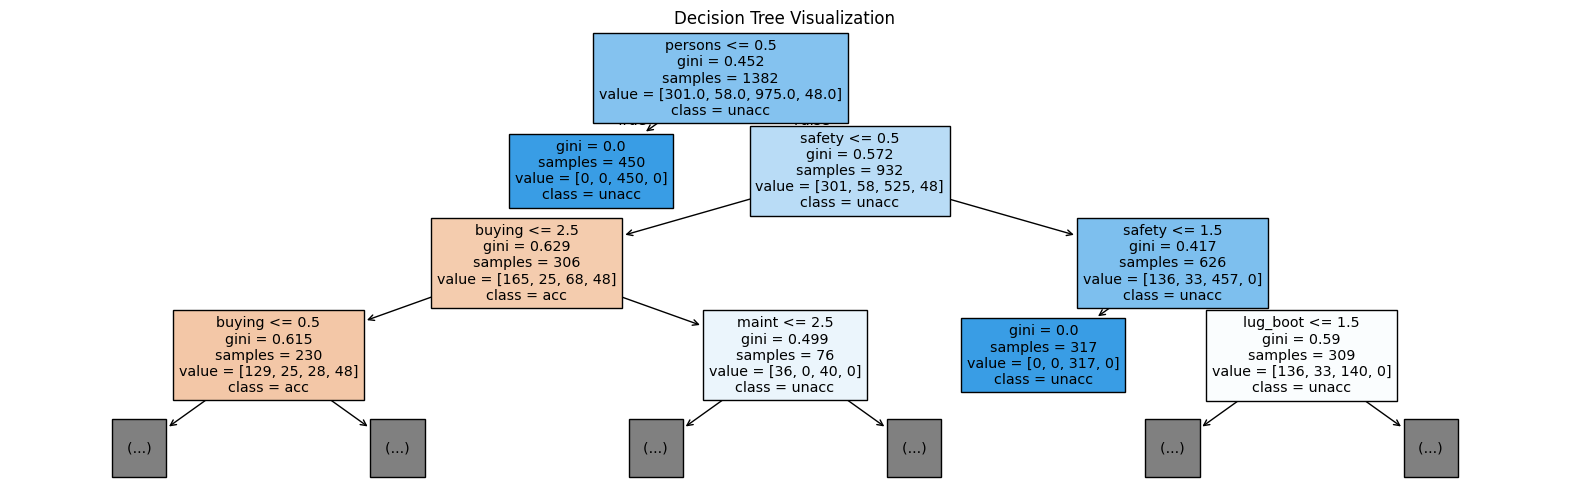

In [156]:
plt.figure(figsize=(20, 6))
plot_tree(dt_clf, feature_names=X_train_le.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

Feature importances:
 safety      0.299864
maint       0.268115
persons     0.173189
buying      0.147274
lug_boot    0.089905
doors       0.021653
dtype: float64


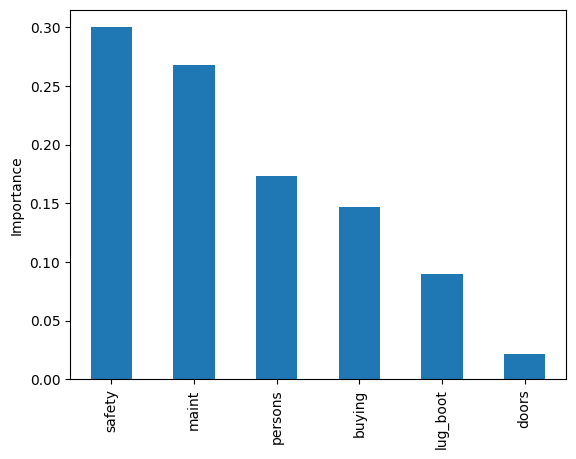

In [155]:
importances = pd.Series(dt_clf.feature_importances_, index=X_train_le.columns)
importances = importances.sort_values(ascending=False)
print("Feature importances:\n", importances)
importances.plot(kind='bar')
plt.ylabel("Importance")
plt.show()

In [99]:
print("Decision Tree Training accuracy:", dt_clf.score(X_train_le, y_train_le))
print("Decision Tree Test accuracy:", dt_clf.score(X_test_le, y_test_le))

Decision Tree Training accuracy: 0.947178002894356
Decision Tree Test accuracy: 0.9393063583815029


#### Summary

For this model, we set the maximum depth to 8 so the tree does not grow too deep and overfit the training data, and required at least 10 samples to split an internal node, which helps the tree generalize better. The "gini" criterion was used to measure how well a split separates the classes. The outcome showed a very good performance, with an accuracy of about 93%. According to the classification report, the model predicted most classes very well, especially the largest one, "unacc", but was a bit less precise on smaller classes like "acc". Analyzing feature importance, the model considered "safety", "maintenance", and "persons" as the most influential attributes for making predictions. This tells us that the safety level and how expensive the car is to maintain play a large role in the final decision.

### Random Forest

Training a Random Forest classifier, experimenting with parameters such as `n_estimators`, `max_features`, and `bootstrap`.

In [157]:
rf_params = {
    'n_estimators': 100,
    'max_features': 'sqrt',
    'bootstrap': True,
    'random_state': 42
}

rf_clf = RandomForestClassifier(**rf_params)
rf_clf.fit(X_train_le, y_train_le)
y_pred_rf = rf_clf.predict(X_test_le)

In [158]:
print("Random Forest Classification Report:\n", classification_report(y_test_le, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test_le, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346

Random Forest Accuracy: 0.9739884393063584


Feature importances:
 safety      0.276100
persons     0.218374
buying      0.190115
maint       0.162154
lug_boot    0.085626
doors       0.067631
dtype: float64


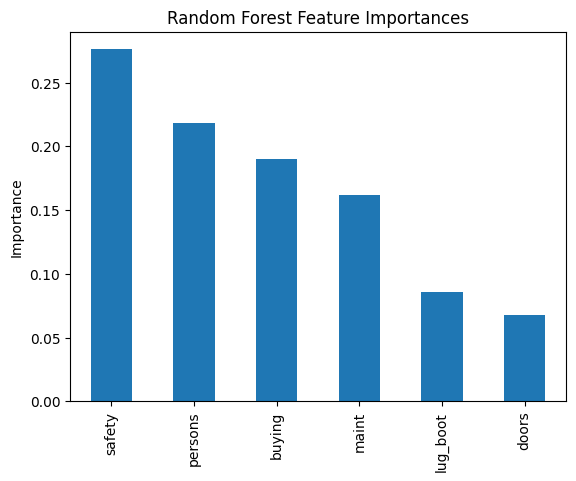

In [159]:
importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train_le.columns)
importances_rf = importances_rf.sort_values(ascending=False)
print("Feature importances:\n", importances_rf)
importances_rf.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.show()

In [160]:
print("Random Forest Training accuracy:", rf_clf.score(X_train_le, y_train_le))
print("Random Forest Test accuracy:", rf_clf.score(X_test_le, y_test_le))

Random Forest Training accuracy: 1.0
Random Forest Test accuracy: 0.9739884393063584


#### Summary

I experimented with 100 trees to ensure enough variety, used the square root of the number of features at each split for randomness, and enabled bootstrapping to sample data differently for each tree. These parameter choices are common because they balance performance and computational efficiency. The model achieved even higher accuracy—about 97%. It predicted all classes very well, with especially high scores on the main class, and even the smaller classes like "vgood" and "good" were classified better than with the single decision tree. Feature importance analysis revealed that "safety" and "persons" are still very influential, but "buying" and "maintenance" also play a significant role. This result shows that the Random Forest captures the decision logic in the data very well, benefiting from combining multiple trees.

### Neural Network

Training a simple Neural Network using the one-hot encoded features, and experimenting with the number of `hidden layers`, `activation functions`, and `learning rates`.

In [161]:
nn_params = {
    'hidden_layer_sizes': (32, 16),
    'activation': 'logistic',
    'learning_rate_init': 0.01,
    'max_iter': 400,
    'random_state': 42
}

mlp_clf = MLPClassifier(**nn_params)
mlp_clf.fit(X_train_nn, y_train_nn)
y_pred_nn = mlp_clf.predict(X_test_nn)

In [162]:
print("Neural Network Classification Report:\n", classification_report(y_test_nn, y_pred_nn, target_names=le_target.classes_))
print("Neural Network Accuracy:", accuracy_score(y_test_nn, y_pred_nn))

Neural Network Classification Report:
               precision    recall  f1-score   support

         acc       1.00      0.99      0.99        83
        good       0.85      1.00      0.92        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.99       346
   macro avg       0.96      0.98      0.97       346
weighted avg       1.00      0.99      0.99       346

Neural Network Accuracy: 0.9942196531791907


In [163]:
print("Neural Network Training accuracy:", mlp_clf.score(X_train_nn, y_train_nn))
print("Neural Network Test accuracy:", mlp_clf.score(X_test_nn, y_test_nn))

Neural Network Training accuracy: 1.0
Neural Network Test accuracy: 0.9942196531791907


#### Summary

I chose two hidden layers with 32 and 16 neurons each, a "logistic" activation function to introduce nonlinearity, a relatively fast learning rate of 0.01, and allowed up to 500 iterations for training. These choices provide enough capacity for the network to learn but avoid making it unnecessarily large. The neural network achieved the highest accuracy, nearly 99.4%. The results show that the model classified all classes very accurately, and especially excelled in predicting the most common classes without any significant errors. This suggests that the neural network is able to model the patterns in this dataset extremely well, possibly even better than tree-based methods for this specific problem.

## Comparison

### Decision Tree

In [170]:
print("Decision Tree Accuracy:", dt_clf.score(X_test_le, y_test_le))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_le, y_pred_dt, target_names=le.classes_))

Decision Tree Accuracy: 0.9393063583815029

Decision Tree Classification Report:
              precision    recall  f1-score   support

         acc       0.98      0.78      0.87        83
        good       0.47      0.82      0.60        11
       unacc       0.97      1.00      0.99       235
       vgood       0.81      1.00      0.89        17

    accuracy                           0.94       346
   macro avg       0.81      0.90      0.84       346
weighted avg       0.95      0.94      0.94       346



### Random Forest

In [172]:
print("Random Forest Accuracy:", rf_clf.score(X_test_le, y_test_le))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_le, y_pred_rf, target_names=le.classes_))

Random Forest Accuracy: 0.9739884393063584

Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.99      0.90      0.94        83
        good       0.65      1.00      0.79        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



### Neural Network

In [174]:
print("Neural Network Accuracy:", mlp_clf.score(X_test_nn, y_test_nn))
print("\nNeural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn, target_names=le_target.classes_))

Neural Network Accuracy: 0.9942196531791907

Neural Network Classification Report:
              precision    recall  f1-score   support

         acc       1.00      0.99      0.99        83
        good       0.85      1.00      0.92        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.99       346
   macro avg       0.96      0.98      0.97       346
weighted avg       1.00      0.99      0.99       346



## Conclusion

Based on the accuracy and the classification reports, all three models performed very well on the car evaluation dataset. The Decision Tree achieved an accuracy of approximately 93%, the Random Forest reached about 97%, and the Neural Network outperformed both with an accuracy of nearly 99%. In terms of precision, recall, and F1-score, the neural network and random forest models achieved very high values across almost all classes, while the decision tree was slightly less consistent, especially on smaller classes. All models predicted the main class ("unacc") with very high precision and recall, but the neural network had the most balanced performance for every class.